In [70]:
import pickle as pkl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
print('load data...')
data = pkl.load(open("test_files_features.pkl", "rb"))
x = data
target = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]
y = pd.Series(data=y, index=range(0,23), dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print('training classifier...')
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("accuracy = " + str(metrics.accuracy_score(y_test, y_pred)))

load data...
training classifier...
accuracy = 0.7142857142857143


plotting feature importance...


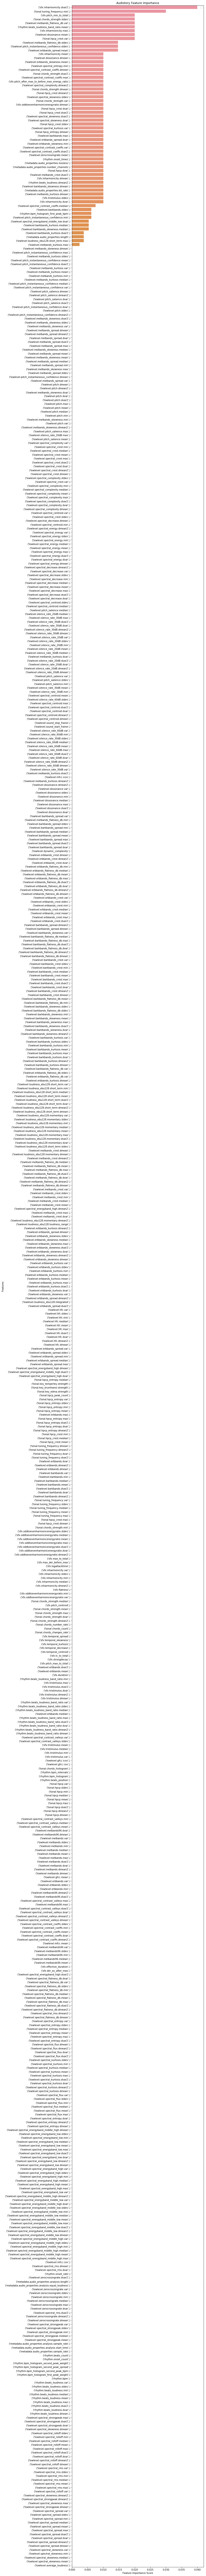

In [72]:
print('plotting feature importance...')
feature_imp = pd.Series(classifier.feature_importances_, index=data.columns).sort_values(ascending=False)

%matplotlib inline
a4_dims = (10, 200)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Audiotory Feature Importance")
plt.legend()
plt.show()